### *ONLINE IMAGE TO TEXT CONVERSION AND EXTRACTION*
* 1) Problem Statement: The objective is to build a CNN-based OCR model that can accurately extract text from images
* 2) Data Collection
* 3) Data Preprocessing
* 4) Exploratory Data Analysis (EDA)
* 5) Model Development
* 6) Model Training
* 7) Evaluation and Analysis
* 8) Model Optimization
* 9) creating a Predictive system (demo)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to be values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Print the shape of the data
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [ ]:
# Create an ImageDataGenerator instance with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images by a random degree between -10 and 10
    width_shift_range=0.1,  # Shift images horizontally by a fraction of total width
    height_shift_range=0.1, # Shift images vertically by a fraction of total height
    shear_range=0.2,        # Shear intensity (angle in counter-clockwise direction)
    zoom_range=0.2,         # Zoom images by a random factor between 0.8 and 1.2
    horizontal_flip=True,   # Flip images horizontally
    vertical_flip=False     # Do not flip images vertically
)


In [ ]:

# Reshape the data to 4D tensor (batch_size, height, width, channels) for ImageDataGenerator
train_images_reshaped = train_images.reshape(train_images.shape[0], 28, 28, 1)

# Fit the ImageDataGenerator on the training data
datagen.fit(train_images_reshaped)

# Create an iterator to generate augmented images
augmented_images_iterator = datagen.flow(train_images_reshaped, train_labels, batch_size=32)


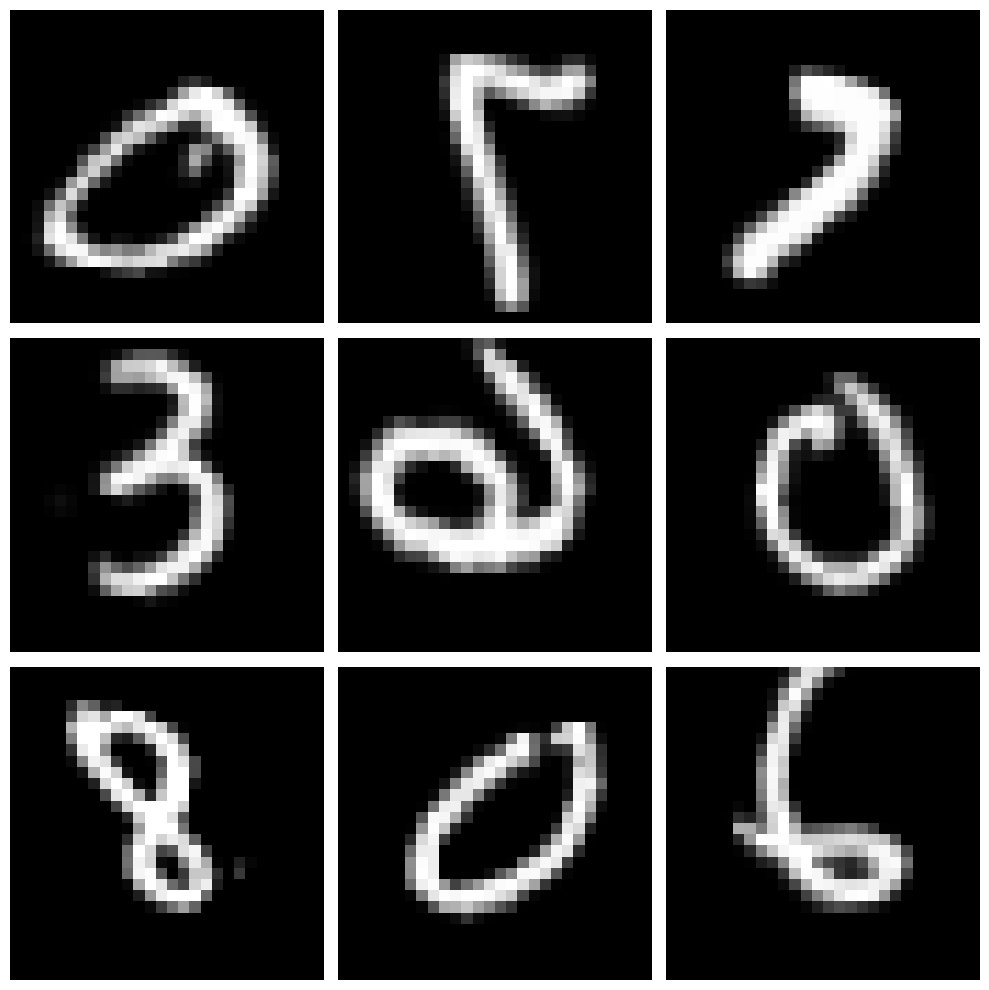

In [ ]:
# Generate and visualize augmented images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    batch = augmented_images_iterator.next()
    image = batch[0][0].reshape(28, 28)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Flatten the images for easier analysis
train_images_flat = train_images.reshape(train_images.shape[0], -1)


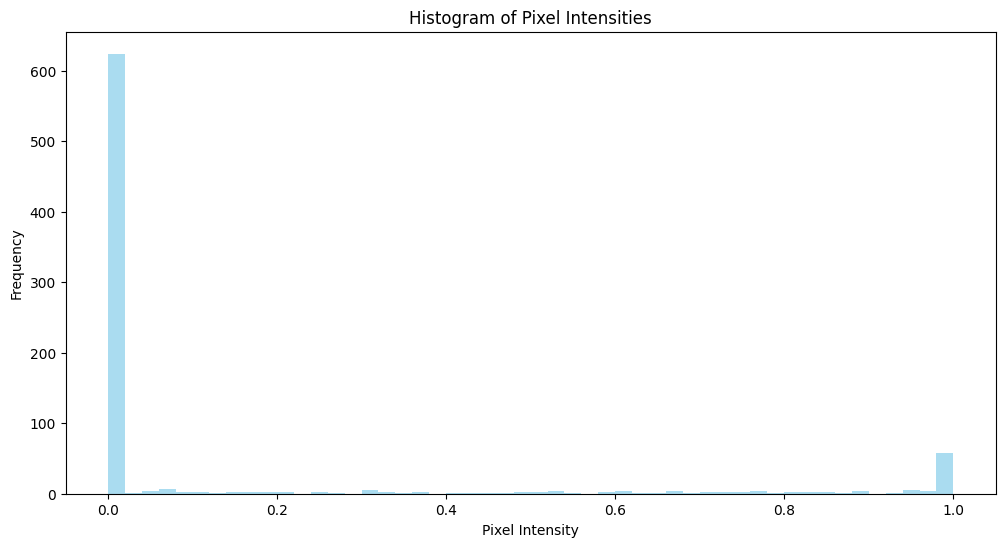

In [ ]:
# 1. Histogram of Pixel Intensities
plt.figure(figsize=(12, 6))
plt.hist(train_images_flat[0], bins=50, color='skyblue', alpha=0.7)
plt.title('Histogram of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

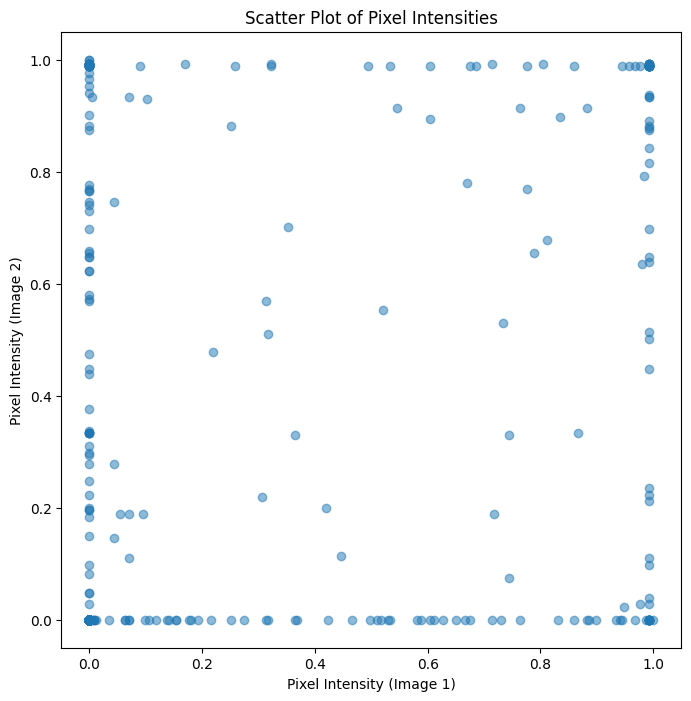

In [ ]:
#  Scatter Plot of Pixel Intensities
plt.figure(figsize=(8, 8))
plt.scatter(train_images_flat[0], train_images_flat[1], alpha=0.5)
plt.title('Scatter Plot of Pixel Intensities')
plt.xlabel('Pixel Intensity (Image 1)')
plt.ylabel('Pixel Intensity (Image 2)')
plt.show()

In [ ]:
# Pairplot of Pixel Intensities
sns.pairplot(pd.DataFrame(train_images_flat[:, :5]))
plt.suptitle('Pairplot of Pixel Intensities', y=1.02)
plt.show()

NameError: name 'pd' is not defined

In [ ]:
# Heatmap of Pixel Intensities
plt.figure(figsize=(10, 8))
sns.heatmap(train_images_flat[:10], cmap='viridis')
plt.title('Heatmap of Pixel Intensities')
plt.xlabel('Pixel')
plt.ylabel('Image')
plt.show()

In [ ]:
# Pie Chart of Class Label Distribution
class_counts = dict(Counter(train_labels))
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Class Label Distribution')
plt.axis('equal')
plt.show()

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training Images Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Images Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)


In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [ ]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Perform predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))


In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# using Gemini Pro with LangChain on Google AI Studio
# I will first install python libs
!pip -q install langchain_experimental langchain_core
!pip -q install google-generativeai==0.3.1
!pip -q install google-ai-generativelanguage==0.4.0
!pip -q install langchain-google-genai
!pip -q install "langchain[docarray]"

In [ ]:
#Check The model specification
!pip show langchain langchain-core

In [ ]:
#@title Setting up the Auth
import os
import google.generativeai as genai
from google.colab import userdata
from google.colab import userdata


In [ ]:
API_KEY=userdata.get('GOOGLE_API_KEY')

from IPython.display import display
from IPython.display import Markdown

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [ ]:
import requests
from IPython.display import Image

image_url = "https://templates.invoicehome.com/receipt-template-us-neat-750px.png"
content = requests.get(image_url).content
Image(content,width=300)

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What is the image showing ??",
        },
        {
            "type": "image_url",
            "image_url": image_url
         },
    ]
)

llm.invoke([message])

In [ ]:
!pip install streamlit

In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501